In [6]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('../data/train.csv')
df2 = pd.DataFrame(df)

In [ ]:
print(df2.head(5))

In [ ]:
scores = pd.DataFrame(data = df, columns = ['UserId', 'Prediction'])
print(scores.shape)
print(scores.head(5))

In [ ]:
user_counts = scores['UserId'].value_counts()
print(user_counts.mean())

In [ ]:
user_counts = user_counts[user_counts > 10]
print(user_counts.shape)
print(user_counts.head(10))

In [ ]:
df2['Prediction'].value_counts(sort=False).plot.bar()

            Prediction  Reviews
ProductId                      
0006641040     4.40000       30
141278509X     5.00000        1
2734888454     5.00000        1
2841233731     5.00000        1
7310172001     4.77305      141


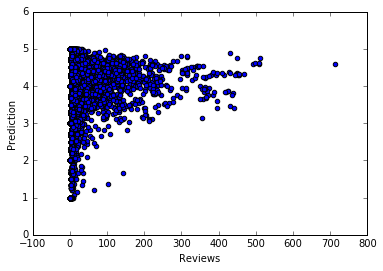

In [10]:
df3 = pd.DataFrame(data = df, columns=['ProductId', 'Prediction'])
#products['ProductId'] = df3['ProductId'].unique()
#print(df3.head(5))
products = df3.groupby('ProductId').mean()
products['Reviews'] = df3['ProductId'].value_counts()
print(products.head())
#products = products[products['Reviews'] > 100]
products.plot.scatter(x = 'Reviews', y = 'Prediction')

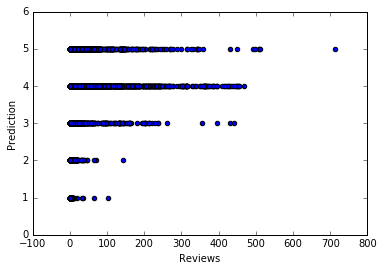

In [11]:
products = products.round(0).astype(int)
products.plot.scatter(x = 'Reviews', y = 'Prediction')

In [21]:
df4 = pd.DataFrame(data = df, columns=['ProductId', 'HelpfulnessDenominator'])
prod_avg = df3.groupby('ProductId').mean()
rev_avg = df4.groupby('ProductId').mean()
print(prod_avg.head(5))
print(rev_avg.head(5))
final = pd.concat([prod_avg, rev_avg], axis = 1)

            Prediction
ProductId             
0006641040     4.40000
141278509X     5.00000
2734888454     5.00000
2841233731     5.00000
7310172001     4.77305
            HelpfulnessDenominator
ProductId                         
0006641040                3.866667
141278509X                1.000000
2734888454                0.000000
2841233731                0.000000
7310172001                1.304965


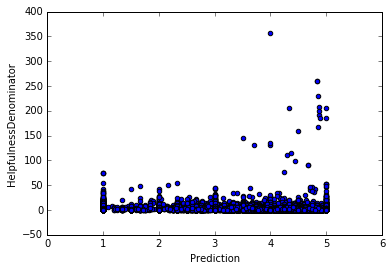

In [23]:
final.plot.scatter(x = 'Prediction', y = 'HelpfulnessDenominator')

# Confirmado los scatter no sirven para un carajo en este tp